                     accuracy  precision    recall  f1 score
Logistic Regression  0.860656   0.860972  0.860656  0.860286
Decision Tree        0.770492   0.774947  0.770492  0.767323
Random Forest        0.819672   0.819529  0.819672  0.819379
SVM                  0.540984   0.292663  0.540984  0.379840


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


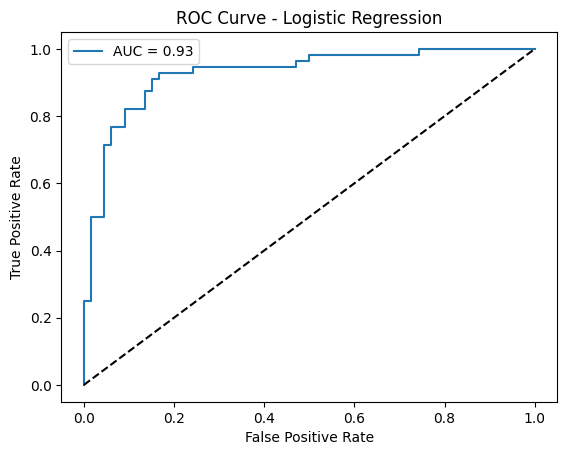

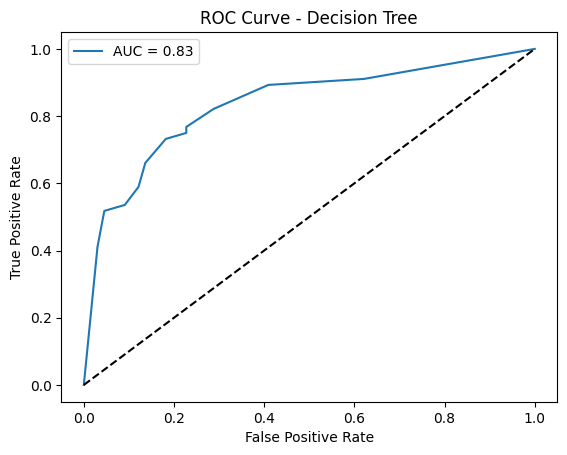

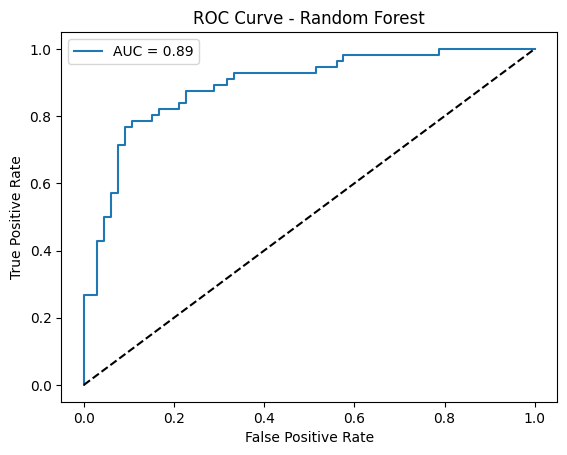

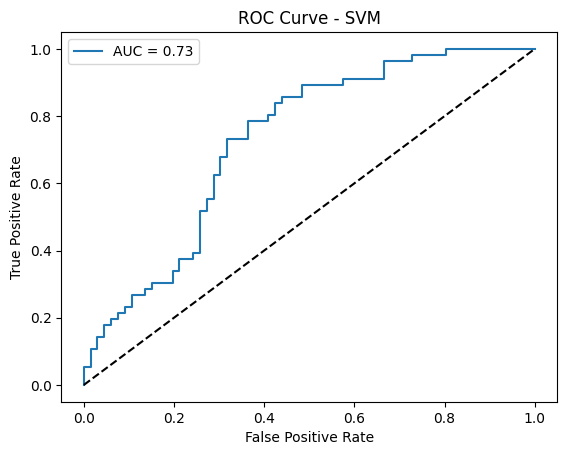

['../models/final_supervised_model.pkl']

In [4]:
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import joblib
from src.utils import Train

# Load reduced datasets
X_train_reduc = pd.read_csv("../data/X_train_reduc.csv")
X_test_reduc = pd.read_csv("../data/X_test_reduc.csv")
y_train = pd.read_csv("../data/y_train.csv").squeeze()
y_test = pd.read_csv("../data/y_test.csv").squeeze()

#Supervised Learning Techniques and Comparisons
train_model = Train(X_train_reduc, y_train, X_test_reduc, y_test)
metrics_all = [train_model.logistic_reg().get_metrics(train_model.log_clf),
train_model.decision_tree().get_metrics(train_model.dt_clf),
train_model.random_forest().get_metrics(train_model.rf_clf),
train_model.svm().get_metrics(train_model.svm_clf)]

metrics_df = pd.DataFrame(metrics_all, index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'])
print(metrics_df)
train_model.plot_roc(train_model.log_clf, "Logistic Regression")
train_model.plot_roc(train_model.dt_clf, "Decision Tree")
train_model.plot_roc(train_model.rf_clf, "Random Forest")
train_model.plot_roc(train_model.svm_clf, "SVM")

# Save best model
joblib.dump(train_model.log_clf, "../models/final_supervised_model.pkl")